In [73]:
import pandas as pd
import datasist as ds
import numpy as np
import seaborn as sns

In [74]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
%cd ../../src

[Errno 2] No such file or directory: '../../src'
/home/miguel/Documentos/Master-Degree-Research/Positron-Binding-Energy/src


In [92]:
# This is data cointaining all apolar molecules
all_df = pd.read_csv("../data/processed/processed_apolar.csv")
partial_df = pd.read_csv("../data/final/final_apolar.csv")

,Molecule,Formula,Ei,Alpha,Expt,axx,ayy,azz,pi_bond
0,Butane,C4H10,10.6,8.08,35,9.31,7.68,7.24,0
1,Pentane,C5H12,10.4,9.95,60,11.72,9.39,8.74,0
2,Hexane,C6H14,10.2,11.85,80,14.32,10.99,10.23,0
3,Heptane,C7H16,9.9,13.76,105,16.91,12.66,11.72,0
4,Octane,C8H18,10.0,15.68,115,19.60,14.26,13.19,0
5,Nonane,C9H20,10.0,16.75,145,21.31,14.93,14.01,0
6,Ethylene,C2H4,10.5,4.18,20,5.43,3.77,3.35,1
7,Cyclopropane,C3H6,9.9,5.51,10,5.75,5.75,5.04,0
8,Cyclohexane,C6H12,9.9,10.79,80,11.29,11.29,9.78,0
9,Benzene,C6H6,9.3,10.40,150,12.27,12.27,6.67,3


In [98]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

def display_scores(scores):
  
  print("\nErros Relativos:", scores)

  print(f"Erro Relativo Médio: {round(scores.mean(), 2)}\nStd of RE: {round(scores.std(),2)}\nMin and Max RE: {scores.min()}, {scores.max()}")


def metrics(estimator, x, y, cv, scoring="neg_mean_absolute_percentage_error"):
  '''Algoritmo que devolve a análise da métrica a ser analisada em problema 
  de regressão pra um data set já finalizado.'''
  #Parte do CV
  score = -cross_val_score(estimator,x,y,scoring=scoring,cv=cv)

    #Parte do modelo atuando no data set
  estimator.fit(x, y)
  pred = estimator.predict(x)
  rmse = mean_absolute_percentage_error(y, pred)
  if scoring == "neg_root_mean_squared_error":
      rmse = np.sqrt(mean_squared_error(y,pred))


  print("Informações sobre validação cruzada: ")
  display_scores(score)
  print(f"\nErro Relativo do modelo sendo aplicado no data set inteiro: {rmse}\n")
  return score.mean()

def log_transform(x):
    return np.log(x)


def log_transform_dataframe(dataframe, column_name):
    """
    column_name = List containing the name of the columns
    """
    dataframe = dataframe.copy()

    transformer = FunctionTransformer(log_transform)
    dataframe_transformed = transformer.fit_transform(dataframe[column_name])

    dataframe[column_name] = dataframe_transformed

    return dataframe

# All 20 Molecules

In [99]:
# Creating a description for the data
ds.structdata.describe(all_df)

First five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
0,Butane,C4H10,10.6,8.1,35,0
1,Pentane,C5H12,10.4,10.0,60,0
2,Hexane,C6H14,10.2,11.8,80,0
3,Heptane,C7H16,9.9,13.7,105,0
4,Octane,C8H18,10.0,15.5,115,0




Random five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
15,TetraDecane,C14H30,9.9,26.6,260,0
19,Carbondisulfide,CS2,10.1,8.7,75,2
9,Cyclopropane,C3H6,9.9,5.7,10,0
14,IsoPentane,C5H12,10.3,10.0,60,0
10,Cyclohexane,C6H12,9.9,11.8,80,0




Last five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
15,TetraDecane,C14H30,9.9,26.60,260,0
16,Propane,C3H8,11.1,6.30,10,0
17,Tetrachloroethylene,C2Cl4,9.3,12.30,57,1
18,1-2-trans-Dichloroethylene,C2H2Cl2,9.6,8.15,15,1
19,Carbondisulfide,CS2,10.1,8.70,75,2




Shape of  data set: (20, 6)


Size of  data set: 120


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Molecule,object
Formula,object
Ei,float64
Alpha,float64
Expt,int64
pi_bond,int64




Numerical Features in Data set
['Ei', 'Alpha', 'Expt', 'pi_bond']


Categorical Features in Data set


['Molecule', 'Formula']



Statistical Description of Columns


,Ei,Alpha,Expt,pi_bond
count,20.000000,20.000000,20.000000,20.000000
mean,9.915000,12.932500,109.200000,0.750000
std,0.602866,6.935953,94.098269,1.332785
min,8.200000,4.200000,10.000000,0.000000
25%,9.825000,8.187500,51.500000,0.000000
50%,9.900000,11.100000,78.500000,0.000000
75%,10.225000,15.775000,146.250000,1.000000
max,11.100000,30.300000,310.000000,5.000000




Description of Categorical Features


,count,unique,top,freq
Molecule,20,20,Butane,1
Formula,20,19,C5H12,2




Unique class Count of Categorical features


,Feature,Unique Count
0,Molecule,20
1,Formula,19




Missing Values in Data


,features,missing_counts,missing_percent
0,Molecule,0,0.0
1,Formula,0,0.0
2,Ei,0,0.0
3,Alpha,0,0.0
4,Expt,0,0.0
5,pi_bond,0,0.0


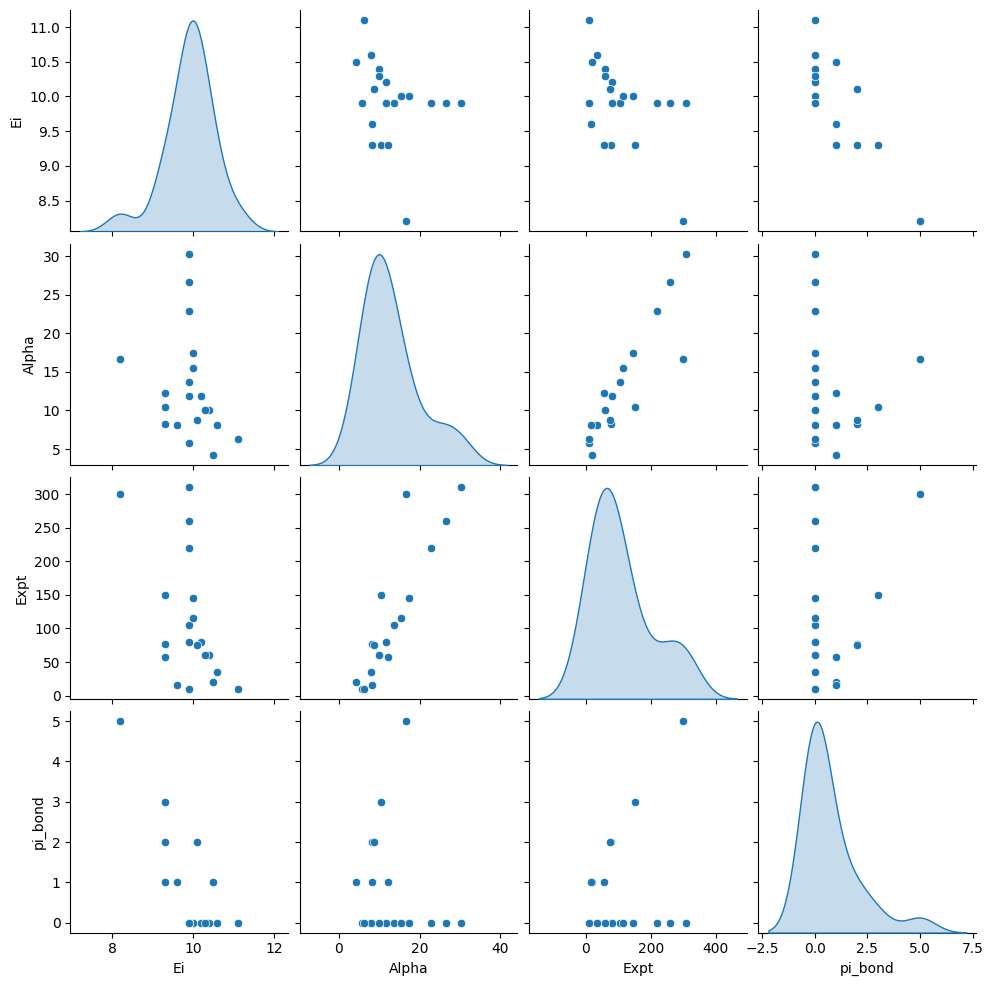

In [100]:
sns.pairplot(all_df, diag_kind='kde')

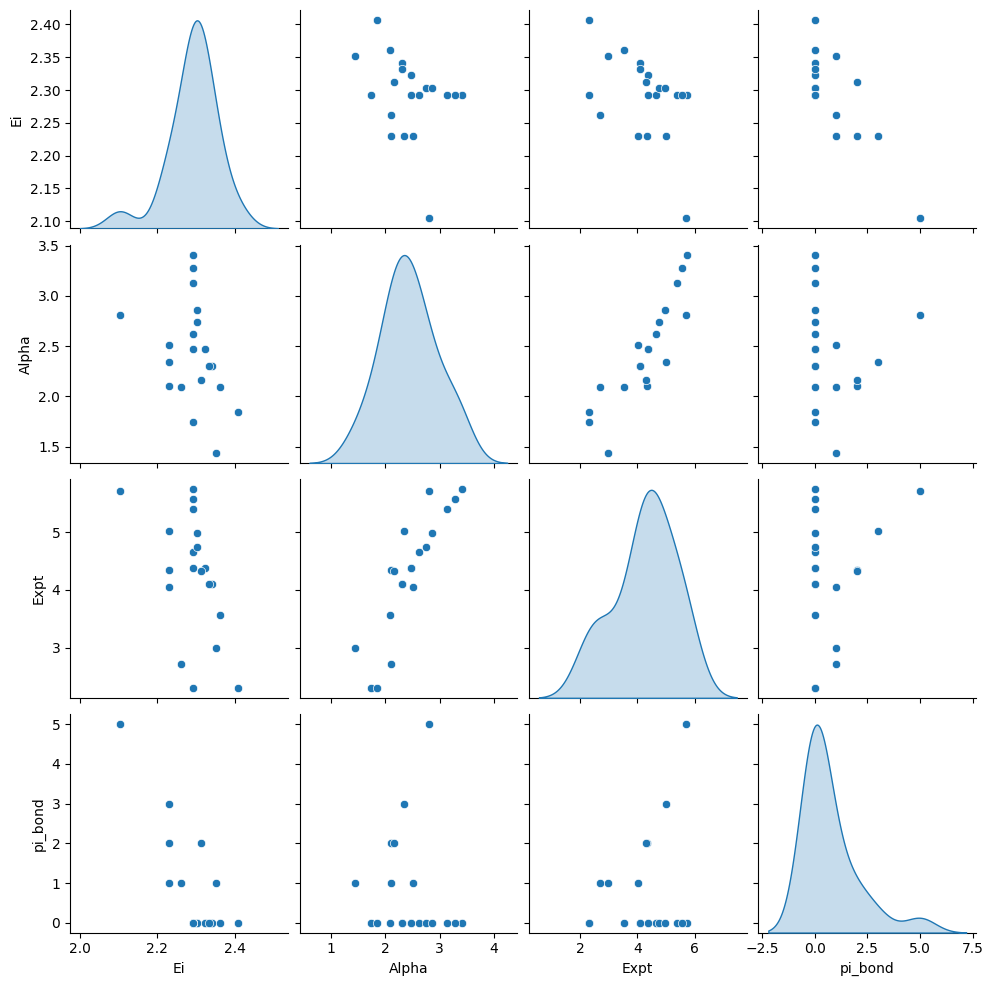

In [101]:
transformed_data_all = log_transform_dataframe(all_df, ['Ei', 'Alpha', 'Expt'])
sns.pairplot(transformed_data_all, diag_kind='kde')

In [102]:
from sklearn.svm import SVR

x0 = all_df.drop(['Molecule', 'Formula','Expt'],axis=1)
y0 = all_df[['Expt']]

metrics(SVR(kernel='linear'), x0, y0, 5)

Informações sobre validação cruzada: 

Erros Relativos: [0.01937457 0.04320986 0.4830854  0.22712142 0.90682647]
Erro Relativo Médio: 0.34
Std of RE: 0.33
Min and Max RE: 0.019374568809116654, 0.9068264685354275

Erro Relativo do modelo sendo aplicado no data set inteiro: 0.2852625155116916



0.33592354292879867

In [103]:
from sklearn.linear_model import LinearRegression
metrics(LinearRegression(), x0, y0, 5)

Informações sobre validação cruzada: 

Erros Relativos: [0.17203118 0.01822387 1.16727602 0.12005978 1.26774099]
Erro Relativo Médio: 0.55
Std of RE: 0.55
Min and Max RE: 0.01822387134980596, 1.2677409917257818

Erro Relativo do modelo sendo aplicado no data set inteiro: 0.3893510502649059



0.5490663677589354

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

transformer = FunctionTransformer(log_transform)

numerical_transformer = ColumnTransformer([('log', transformer, [0, 1])])

svr = Pipeline([('log', numerical_transformer), ('reg', SVR(kernel='linear'))])
lin = Pipeline([('log', numerical_transformer), ('reg', LinearRegression())])

In [105]:
metrics(svr, x0, y0, 5)

Informações sobre validação cruzada: 

Erros Relativos: [0.4370173  0.58934051 2.4200089  0.42792806 3.40207205]
Erro Relativo Médio: 1.46
Std of RE: 1.23
Min and Max RE: 0.42792806212051127, 3.402072050468889

Erro Relativo do modelo sendo aplicado no data set inteiro: 1.3050386029798333



1.4552733654167516

In [106]:
metrics(lin, x0, y0, 5)

Informações sobre validação cruzada: 

Erros Relativos: [0.25959972 0.16486012 2.35013489 0.34171023 2.80865144]
Erro Relativo Médio: 1.18
Std of RE: 1.15
Min and Max RE: 0.1648601202047419, 2.808651439993141

Erro Relativo do modelo sendo aplicado no data set inteiro: 0.7752892402979368



1.1849912795323054

In [107]:
# This test was just to compare if the log transform could help us, but it seens it won't

# 17 Molecules

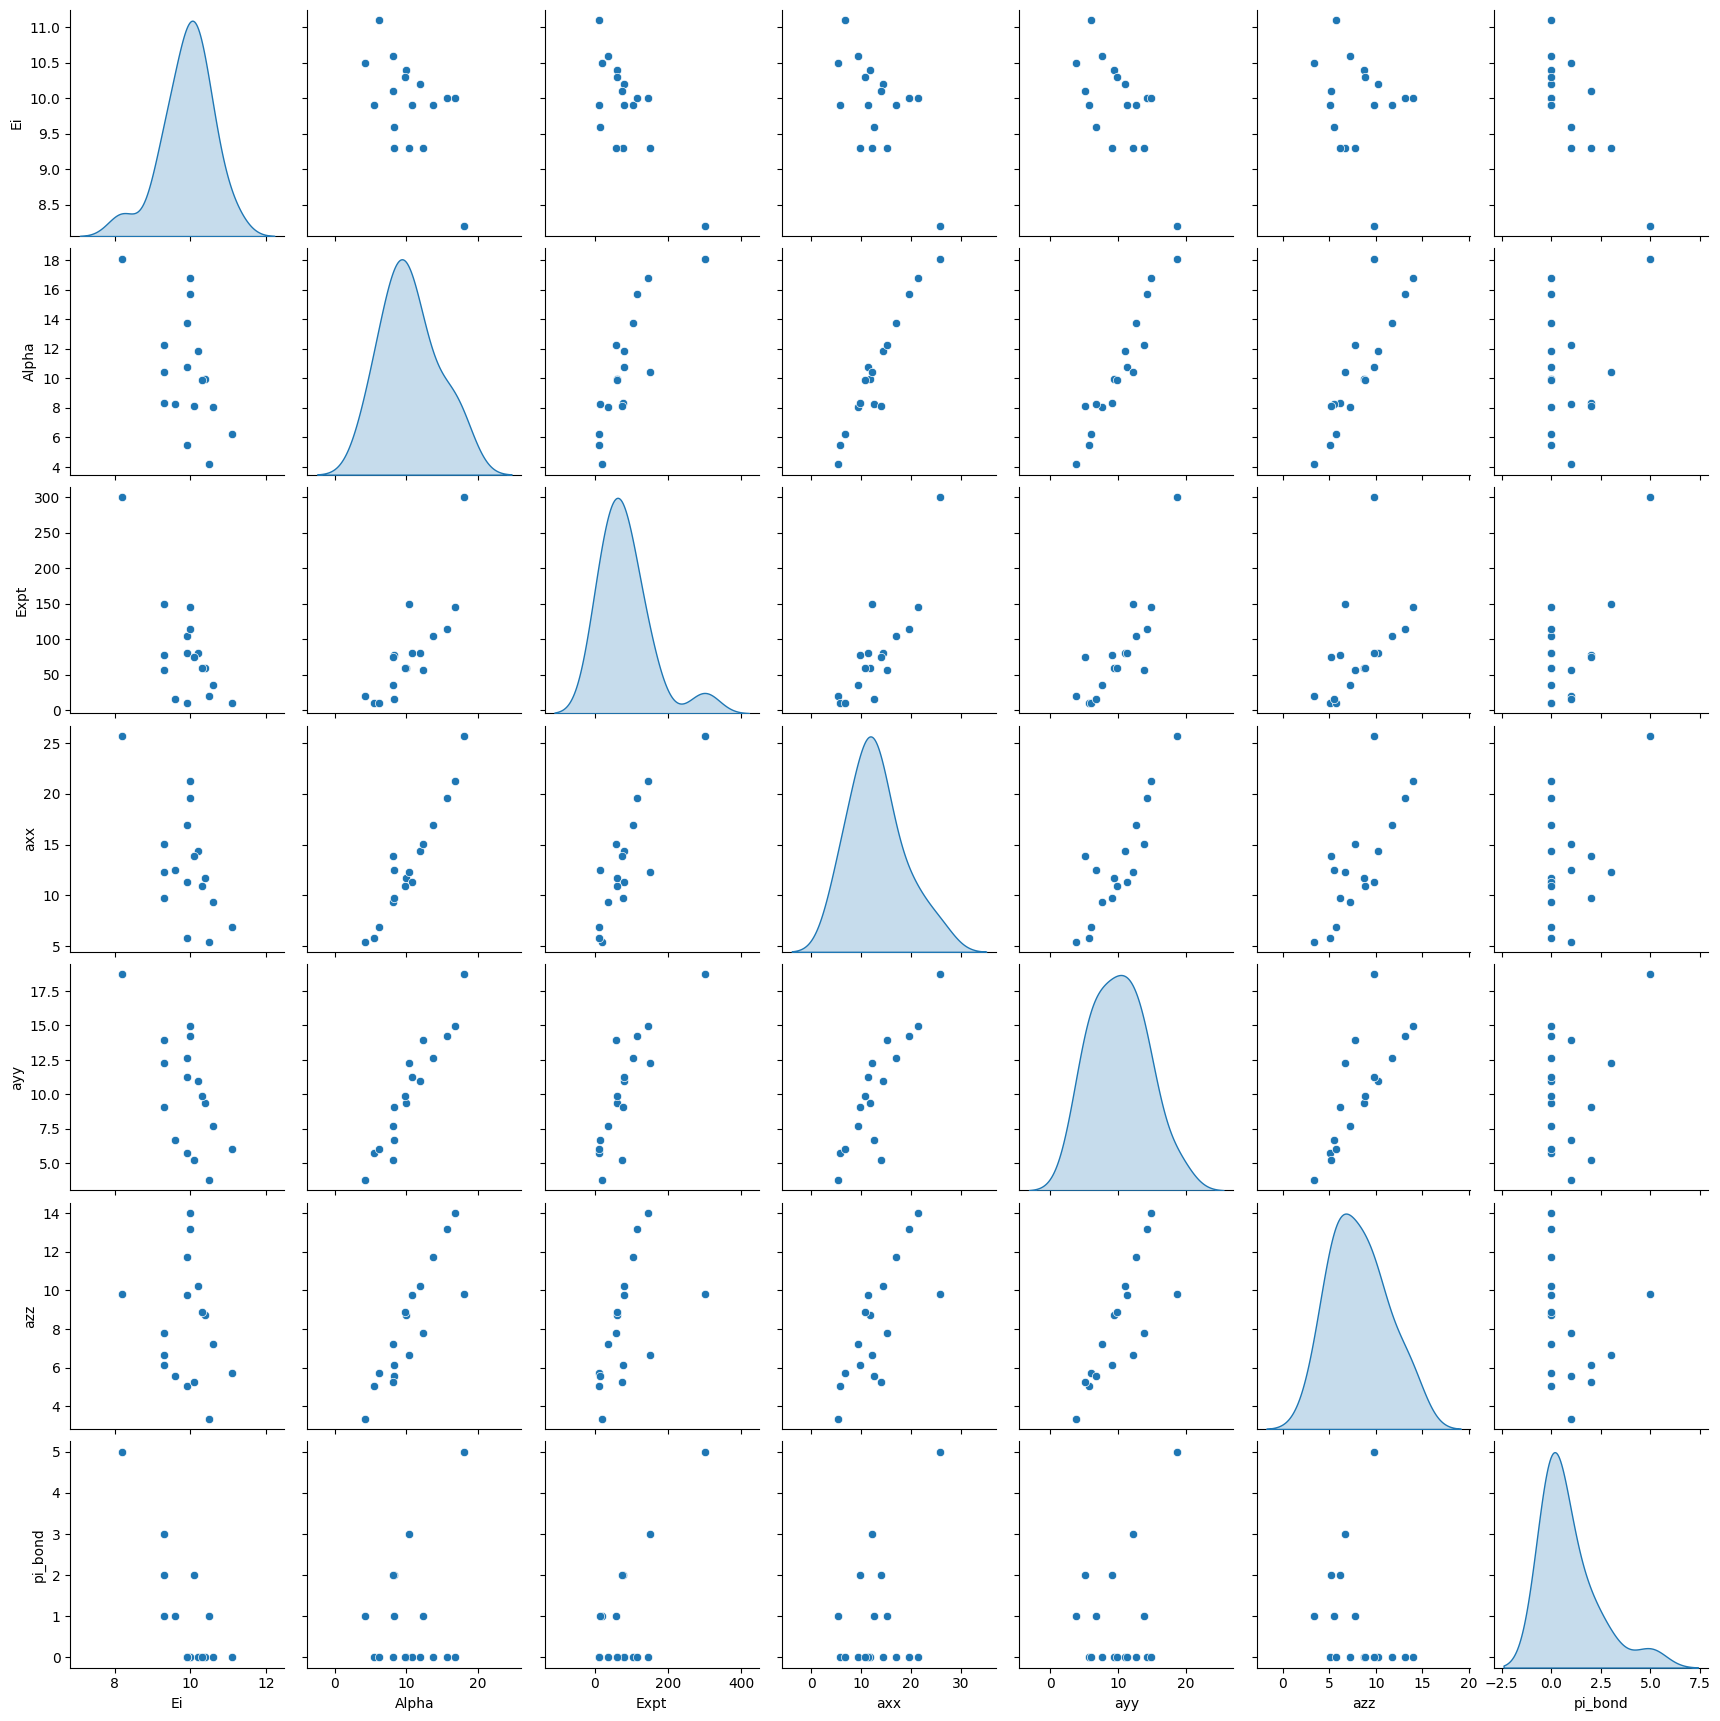

In [108]:
sns.pairplot(partial_df, diag_kind='kde')

In [109]:
# Since axx, ayy and azz are already normal we are not transforming them.